# Calculate gradient in Tesorflow

In [1]:
import tensorflow as tf

In [2]:
x=tf.random.normal(shape=(2,2))
y=tf.random.normal(shape=(2,2))

$f(x,y)= \sqrt{(x^2 +y^2)}$

$\nabla f(x,y)= \frac{\partial f}
{\partial x} \hat{\imath} +\frac
{\partial f}{\partial y} \hat{\jmath}$


In [3]:
with tf.GradientTape() as tape:
    tape.watch(x)# calculate the gradient with respect to x
    f=tf.sqrt(tf.square(x) +tf.square(y))
    df_dx=tape.gradient(f,x)
    print(df_dx)

tf.Tensor(
[[ 0.90491503  0.96570474]
 [-0.7853826   0.9462325 ]], shape=(2, 2), dtype=float32)


In [5]:
with tf.GradientTape() as tape:
    tape.watch(y)
    f=tf.sqrt(tf.square(x)+ tf.square(y))
    df_dy=tape.gradient(f,y)
    print(df_dy)

tf.Tensor(
[[ 0.42559218  0.25964257]
 [-0.6190106  -0.32348713]], shape=(2, 2), dtype=float32)


In [16]:

with tf.GradientTape() as tape:
    tape.watch(x)# if we use constant then we have to use watch
    tape.watch(y)
    f=tf.sqrt(tf.square(x)+ tf.square(y))
    df_dx, df_dy=tape.gradient(f,[x,y])# partial derivatives with respect to x and y
    #df_dy=tape.gradient(f,y)
    print(df_dx)
    print(df_dy)

tf.Tensor(0.8320503, shape=(), dtype=float32)
tf.Tensor(0.5547002, shape=(), dtype=float32)


In [12]:
x=tf.Variable(3.)
y=tf.Variable(2.)

In [17]:
with tf.GradientTape() as tape:
    #tape.watch(x)
    #tape.watch(y) if we use variable then watch is not mandatory
    f=tf.sqrt(tf.square(x)+ tf.square(y))
    df_dx, df_dy=tape.gradient(f,[x,y])# partial derivatives with respect to x and y
    #df_dy=tape.gradient(f,y)
    print(df_dx)
    print(df_dy)

tf.Tensor(0.8320503, shape=(), dtype=float32)
tf.Tensor(0.5547002, shape=(), dtype=float32)


In [14]:
x/tf.sqrt(tf.square(x)+ tf.square(y))

<tf.Tensor: shape=(), dtype=float32, numpy=0.8320503>

In [15]:
y/tf.sqrt(tf.square(x)+ tf.square(y))

<tf.Tensor: shape=(), dtype=float32, numpy=0.5547002>

# Simple Linear Regression example with tensorflow
$f(x)= W.x +b$

In [18]:
TRUE_W=3.0
TRUE_B=2.0
NUM_EXAMPLES=1000
x=tf.random.normal(shape=[NUM_EXAMPLES])
noise=tf.random.normal(shape=[NUM_EXAMPLES])
y=x*TRUE_W +TRUE_B +noise

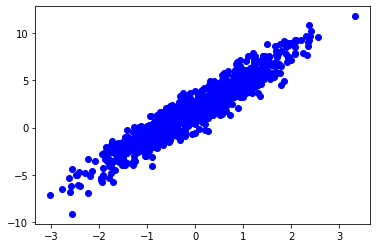

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x,y,c="b")
plt.show()

# Without noise 

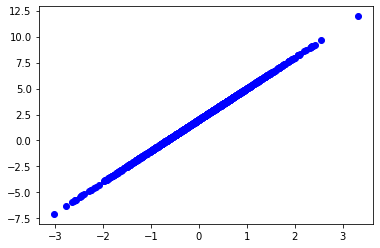

In [20]:
y=x*TRUE_W +TRUE_B
import matplotlib.pyplot as plt
plt.scatter(x,y,c="b")
plt.show()

# Lets define a model

In [22]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # initials weights
        self.w=tf.Variable(5.0)
        self.b=tf.Variable(0.0)
    def __call__(self,x):
        return self.w*x+self.b

In [23]:
class Test:
    def __init__(self,x):
        self.x=x
    def __call__(self):
        return self.x**3
    

In [24]:
obj=Test(2)
obj